In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../data/train_xy.csv')

In [3]:
train.head()

cust_id cust_group  y       x_1       x_2  x_3  x_4  x_5  x_6  x_7  ...    \
0   110000    group_3  0  0.354167  0.604988  -99  -99  -99  -99  -99  ...     
1   110001    group_3  0  0.125000  0.012058  -99  -99  -99  -99  -99  ...     
2   110002    group_3  0  0.333333  0.565979    0    0    0    0    0  ...     
3   110003    group_3  0  0.208333  0.316209    0    0    0    0    1  ...     
4   110004    group_3  0  0.208333  0.008061  -99  -99  -99  -99  -99  ...     

   x_148  x_149  x_150  x_151  x_152  x_153  x_154  x_155  x_156  x_157  
0      1      1      1      1      1      1      1      1      3    -99  
1      1      1      1      1      1      1      1      1      2      2  
2      1      1      2      1      1      1      1      1      2      2  
3      2      1      1      1      1      1      1      1      2      4  
4      1      1      1      1      1      1      1      1      2      1  

[5 rows x 160 columns]

In [4]:
test = pd.read_csv('../data/train_x.csv')

In [5]:
x_train = train.drop(['cust_id','cust_group','y'],axis=1)
x_train.shape

(15000, 157)

In [6]:
x_test = test.drop(['cust_id','cust_group'],axis=1)
x_test.shape

(10000, 157)

iv_feature = ['x_3', 'x_4', 'x_5',
       'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14',
       'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22',
       'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30',
       'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46',
       'x_47', 'x_48', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55',
       'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63',
       'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71',
       'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79',
       'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87',
       'x_88', 'x_90', 'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139',
       'x_140', 'x_141', 'x_142', 'x_143', 'x_144', 'x_149', 'x_150',
       'x_153', 'x_154', 'x_155', 'x_157']

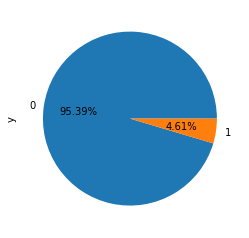

In [7]:
train['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [8]:
Y_train = train['y']

In [9]:
Y_train.shape

(15000,)

In [10]:
x = pd.concat([x_train,x_test])
x.shape

(25000, 157)

In [11]:
for i in range(96,158):
    col = 'x'+'_'+str(i)
    if col in x.columns.values:
        dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
        x = pd.concat([x, dummies_df], axis=1)

In [12]:
x.shape

(25000, 361)

In [13]:
train_X = x[0:15000]
test_X = x[15000:25000]
print(train_X.shape)
print(test_X.shape)

(15000, 361)
(10000, 361)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn import metrics  #accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import label_propagation
from sklearn import model_selection
from sklearn.cross_validation import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn import linear_model

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Reshape, Flatten, MaxPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from sklearn.cross_validation import train_test_split
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [23]:
X_train,X_val,y_train,y_val= train_test_split(train_X,Y_train,test_size=0.2,random_state=2)

In [16]:
def split_data(data_):
    idx_1 = data_[data_['label']==0].index
    idx_2 = data_[data_['label']==1].index
    nb_1 = len(data_.loc[idx_1])
    nb_2 = len(data_.loc[idx_2])
#     print(nb_1)
#     print(nb_2)
    idx_list_1 = list(idx_1)
    idx_list_2 = list(idx_2)
    train_x1 = data_.loc[idx_list_1]
    train_x2 = data_.loc[idx_list_2]
#     print(train_x1.shape)
#     print(train_x2.shape)
    return train_x1,train_x2

In [17]:
def resample_data(data, number):
    idx_1 = data.index
    nb_1 = len(idx_1)
#     print(nb_1)
#     number = int(nb_1 * rate)
    idx_1_sub = np.random.choice(idx_1, number)
#     print(idx_1_sub)
    nb_2 = len(data.loc[idx_1_sub])
#     print(nb_2)
    idx_list_1 = list(idx_1_sub)
    train_1 = data.loc[idx_1_sub]
#     print(train_1.shape)
    return train_1

In [18]:
def concat_data(train_x1, train_x2):
    train_data1 = train_x1.drop(['label'],axis =1)
    train_y1 = train_x1['label']
    
    train_data2 = train_x2.drop(['label'],axis =1)
    train_y2 = train_x2['label']
    
    train_data = train_data1.append(train_data2)
    train_y = train_y1.append(train_y2)
    
    return train_data, train_y

In [19]:
xx = X_train
xx['label'] = y_train

xx.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


x_1       x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  ...    \
1154  0.291667  0.389913    0    0    0    0    3    2    0     0  ...     
9804  0.208333  0.425099    0    0    0    0    4    2    0     0  ...     
7919  0.083333  0.491195  -99  -99  -99  -99  -99  -99  -99   -99  ...     
4854  0.291667  0.361088  -99  -99  -99  -99  -99  -99  -99   -99  ...     
5947  0.250000  0.272055    0    0    0    0    2    2    0     0  ...     

      x_1562  x_1563  x_157-99  x_1571  x_1572  x_1573  x_1574  x_15710  \
1154       0       0         0       0       0       0       1        0   
9804       1       0         1       0       0       0       0        0   
7919       1       0         1       0       0       0       0        0   
4854       0       0         1       0       0       0       0        0   
5947       1       0         1       0       0       0       0        0   

      x_15711  label  
1154        0      0  
9804        0      1  
7919        0      0  
4854        0      0  
5947        0      0  

[5 rows x 362 columns]

In [20]:
train_x1, train_x2 = split_data(xx)
print(train_x1.shape)
print(train_x2.shape)

(11442, 362)
(558, 362)


In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(12000, 361)
(12000,)
(3000, 361)
(3000,)


In [64]:
train_temp = resample_data(train_x1, 600)
multi_x, multi_y= concat_data(train_temp, train_x2)
gb = XGBClassifier( n_estimators= 100, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.9, 
                        colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1,class_weight='balanced').fit(X_train, y_train)

predictions1 = gb.predict(X_val)

target_names = ['class 0', 'class 1']
print(classification_report(y_val, predictions1, target_names=target_names))
val_auc = metrics.roc_auc_score(y_val,predictions1)#验证集上的auc值
print(val_auc)

             precision    recall  f1-score   support

    class 0       0.96      1.00      0.98      2867
    class 1       0.40      0.02      0.03       133

avg / total       0.93      0.96      0.94      3000

0.506995602015153


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [65]:
print(np.sum(predictions1))
tt = predictions1 + y_val
# tt.iloc[1]
count = 0
for i in range(3000):
    if tt.iloc[i] == 2:
        count = count + 1
print(count)

5
2


In [61]:
train_temp = resample_data(train_x1, 600)
multi_x, multi_y= concat_data(train_temp, train_x2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, min_samples_split=8, min_samples_leaf=2, max_depth=4).fit(X_train, y_train)

predictions2 = gb.predict(X_val)

target_names = ['class 0', 'class 1']
print(classification_report(y_val, predictions2, target_names=target_names))
val_auc = metrics.roc_auc_score(y_val,predictions2)#验证集上的auc值
print(val_auc)

             precision    recall  f1-score   support

    class 0       0.96      1.00      0.98      2867
    class 1       0.20      0.02      0.04       133

avg / total       0.92      0.95      0.93      3000

0.5091854155794089


In [62]:
print(np.sum(predictions2))
tt = predictions2 + y_val
# tt.iloc[1]
count = 0
for i in range(3000):
    if tt.iloc[i] == 2:
        count = count + 1
print(count)

15
3


In [46]:
pred = []
test_pred = [] 
for i in range(2):
    print('第',i+1,'个模型...')
    train_temp = resample_data(train_x1, 600)
#     print(train_temp.shape)
    multi_x, multi_y= concat_data(train_temp, train_x2)
#     print(multi_x.shape)
#     print(multi_y.shape)
    
    gbm = XGBClassifier( n_estimators= 100, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.9, 
                        colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(multi_x, multi_y)
    
    predictions = gbm.predict_proba(X_val)
    
    test_predictions = gbm.predict_proba(test_X)

#     target_names = ['class 0', 'class 1']
#     print(classification_report(y_val, predictions, target_names=target_names))

#     val_acc = metrics.accuracy_score(y_val,predictions)#验证集上的auc值
#     print(val_acc)
    
    pred.append(predictions[:,1])
    test_pred.append(test_predictions[:,1])

第 1 个模型...
第 2 个模型...


In [51]:
pred_sum = pred[0]
for i in range(1,2):
    pred_sum = pred_sum + pred[i]
# print(pred_sum)
pred_sum_av = pred_sum/2.0
for i in range(3000):
    if pred_sum_av[i] >= 0.5:
        pred_sum_av[i] = 1
    else:
        pred_sum_av[i] = 0

target_names = ['class 0', 'class 1']
print(classification_report(y_val, pred_sum_av, target_names=target_names))

val_acc = metrics.accuracy_score(y_val,pred_sum_av)#验证集上的auc值
print(val_acc)
val_auc = metrics.roc_auc_score(y_val,pred_sum_av)#验证集上的auc值
print(val_auc)
print(np.sum(pred_sum_av))

             precision    recall  f1-score   support

    class 0       0.98      0.71      0.82      2867
    class 1       0.11      0.75      0.19       133

avg / total       0.95      0.71      0.80      3000

0.711
0.7304916459268156
934.0


In [52]:
tt = pred_sum_av + y_val
# tt.iloc[1]
count = 0
for i in range(3000):
    if tt.iloc[i] == 2:
        count = count + 1
print(count)

100


In [35]:
np.sum(y_val)

133

In [53]:
test_pred_sum = test_pred[0]
for i in range(1,2):
    test_pred_sum = test_pred_sum + test_pred[i]
# print(test_pred_sum)
test_pred_sum_av = test_pred_sum/2.0
for i in range(10000):
    if test_pred_sum_av[i] >= 0.5:
        test_pred_sum_av[i] = 1
    else:
        test_pred_sum_av[i] = 0

print(np.sum(test_pred_sum_av))
print(test_pred_sum_av.shape)

5881.0
(10000,)


In [114]:
predictions = gbm.predict(X_val)

target_names = ['class 0', 'class 1']
print(classification_report(y_val, predictions, target_names=target_names))
val_auc = metrics.roc_auc_score(y_val,predictions)#验证集上的auc值
print(val_auc)

             precision    recall  f1-score   support

    class 0       0.98      0.80      0.88      2867
    class 1       0.12      0.58      0.20       133

avg / total       0.94      0.79      0.85      3000

0.6898922401923889


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [115]:
np.sum(predictions)

648

In [134]:
clf = SVC(C=2, kernel='rbf',probability=True,shrinking=True).fit(multi_x, multi_y)

In [135]:
predictions2 = clf.predict(X_val)

target_names = ['class 0', 'class 1']
print(classification_report(y_val, predictions2, target_names=target_names))
val_auc = metrics.roc_auc_score(y_val,predictions2)#验证集上的auc值
print(val_auc)

             precision    recall  f1-score   support

    class 0       0.97      0.82      0.89      2867
    class 1       0.12      0.52      0.19       133

avg / total       0.94      0.80      0.86      3000

0.6680137735339395


In [136]:
np.sum(predictions2)

593

In [49]:
predictions1.shape

(3000,)

In [137]:
pred_sum_sum = predictions + predictions1 + predictions2
print(pred_sum_sum)
for i in range(3000):
    if pred_sum_sum[i] >= 3:
        pred_sum_sum[i] = 1
    else:
        pred_sum_sum[i] = 0

target_names = ['class 0', 'class 1']
print(classification_report(y_val, pred_sum_sum, target_names=target_names))

val_acc = metrics.accuracy_score(y_val,pred_sum_sum)#验证集上的acc值
print(val_acc)
val_acc1 = metrics.accuracy_score(y_val,predictions)#验证集上的acc值
print(val_acc1)
val_auc = metrics.roc_auc_score(y_val,pred_sum_sum)#验证集上的auc值
print(val_auc)
val_auc1 = metrics.roc_auc_score(y_val,predictions)#验证集上的auc值
print(val_auc1)
print(np.sum(pred_sum_sum))

[1 0 1 ... 0 3 0]
             precision    recall  f1-score   support

    class 0       0.97      0.89      0.93      2867
    class 1       0.13      0.37      0.20       133

avg / total       0.93      0.87      0.89      3000

0.8666666666666667
0.791
0.6291006553705505
0.6898922401923889
365


In [128]:
pred_test1 = gb.predict(test_X)

In [129]:
pred_test = gbm.predict(test_X)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [155]:
pred_sum = pred_test1 + pred_test
for i in range(10000):
    if pred_sum[i] >= 1:
        pred_sum[i] = 1
    else:
        pred_sum[i] = 0

In [156]:
pred_sum.shape

(10000,)

In [157]:
np.max(pred_sum)

1

In [158]:
x.shape

(25000, 171)

In [159]:
x.head()

x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  x_11  x_12 ...  x_1552  x_1553  \
0  -99  -99  -99  -99  -99  -99  -99   -99   -99   -99 ...       0       0   
1  -99  -99  -99  -99  -99  -99  -99   -99   -99   -99 ...       0       0   
2    0    0    0    0    0    0    0     0     0     0 ...       0       0   
3    0    0    0    0    1    1    0     0     0     0 ...       0       0   
4  -99  -99  -99  -99  -99  -99    0     1     1     0 ...       0       0   

   x_157-99  x_1571  x_1572  x_1573  x_1574  x_15710  x_15711  y  
0         1       0       0       0       0        0        0  0  
1         0       0       1       0       0        0        0  0  
2         0       0       1       0       0        0        0  0  
3         0       0       0       0       1        0        0  0  
4         0       1       0       0       0        0        0  0  

[5 rows x 171 columns]

In [160]:
pred_sum_pd = pd.DataFrame(pred_sum)

In [161]:
y = Y_train.append(pred_sum_pd)
y.shape

(25000, 1)

In [162]:
x_train.shape

(15000, 103)

In [163]:
x_test.shape

(10000, 103)

In [164]:
xx = pd.concat([x_train,x_test])
xx.shape

(25000, 103)

In [165]:
xx['y'] = y

In [166]:
xx.shape

(25000, 104)

In [167]:
xx.to_csv('../data/train_xy_all.csv',index=False)